In [8]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import scikit_posthocs as sp
import numpy as np

#hide warnings
import warnings
warnings.filterwarnings("ignore")

## Statistical Testing

### Load Dataset

In [9]:
files = ['2023_6_10_16_17_17_atari_space_invaders.csv', '2023_6_11_00_40_56_atari_breakout.csv', '2023_6_11_01_43_35_atari_air_raid.csv', '2023_6_11_09_09_42_atari_asterix.csv', '2023_6_11_10_19_31_atari_bowling.csv', '2023_6_11_11_54_40_atari_aasteroids.csv', '2023_6_11_16_16_46_atari_demon_attack.csv', '2023_6_11_18_38_56_atari_freeway.csv', '2023_6_11_19_46_04_atari_gravitar.csv', '2023_6_11_21_07_40_atari_james_bond.csv', '2023_6_11_22_11_09_atari_pong.csv', '2023_6_11_23_14_08_ms_pac_man.csv', '2023_6_12_00_19_04_montezumas_revenge.csv', '2023_6_12_01_21_01_private_eye.csv', '2023_6_12_02_21_54_qbert.csv', '2023_6_12_03_20_59_sea_quest.csv', '2023_6_12_09_47_36_venture.csv', '2023_6_12_10_51_48wizard_of_wor.csv', '2023_6_12_13_19_31_yars_revenge.csv', '2023_6_12_15_05_14_zaxxon.csv', '2023_6_14_23_06_09_cart_pole.csv', '2023_6_14_23_20_07_addiction.csv', '2023_6_15_02_46_50_lunar_lander.csv']

In [10]:
df_rewards = pd.read_csv(files[0])

In [11]:
unique_categories = df_rewards['capacity'].unique()

In [12]:
for category in unique_categories:
    print(category)

1M
500k
100k
50k
10k
5k
1k
500


In [13]:
def statisticalTesting(file):
    date = file.split('_')[0:6]  # Extract the date portion
    date_string = '_'.join(date)  # Reconstruct the date string
    title = file.replace(date_string + '_', '').replace('.csv', '')  # Remove the date portion from the original string # Remove the date and ".csv" extension
    print(title.capitalize() + " Sim")

    #import data
    df_rewards = pd.read_csv(file)
    print("Index: " + str(df_rewards.index))


    #print boxplot to plot mean reward
    #ax = sns.boxplot(x='capacity', y='reward', data=df_rewards, color='#77B150', width=0.5).set(title=title.capitalize() + ' Simulator: Box Plot of Rewards by Capacity Size')
    #plt.show()

    # Plot density plot of mean reward 
        #doesn't work on cat vars need to convert
    mapping = {
        '1M': 1000000,
        '500k': 500000,
        '100k': 100000,
        '50k': 50000,
        '10k': 10000,
        '5k': 5000,
        '1k': 1000,
        '500': 500
    }
    # Replace the strings with numeric values
    df_rewards['capacity'] = df_rewards['capacity'].replace(mapping)

    # Plot density plot for univariate 
    ax = sns.kdeplot(data=df_rewards, x='capacity', y='reward', fill=True, cmap='Blues', shade=True)
    ax.set(title=title.capitalize() + ' Simulator: Density Plot of Rewards by Capacity Size')

    # Set x-axis limit from 500 to 1 million
    plt.xlim(500, 1000000)  

    # Save the plot as a PNG file
    plt.savefig('plots/'+ title +'.png', dpi=300)  # Specify the desired file path and DPI

    plt.show()

    # Plot density plot for bivariate 
    #ax = sns.kdeplot(data=df_rewards, x='reward', fill=True, color='blue', shade=True)#capacity
    #ax.set(title=title.capitalize() + ' Simulator: Density Plot of Capacity')
    #plt.show()

    # Plot density plot (violin plot)
    #ax = sns.violinplot(x='capacity', y='reward', data=df_rewards, palette='Blues')
    #ax.set(title=title.capitalize() + ' Simulator: Density Plot of Rewards by Capacity Size')
    #plt.show()

    print("\nShapiro-Wilk test")
    # The Shapiro-Wilk test, tests the null hypothesis that the data was drawn from a normal distribution this is an ANOVA assumption
    shapiro_test = stats.shapiro(df_rewards.reward.values) #(p 5%)
    print(shapiro_test)
    print(shapiro_test.statistic)
    print(shapiro_test.pvalue) #reject if less than 0.05

    if(shapiro_test.pvalue <1.0):
        print("\nKruskal-Wallis test")
        # Group the data by capacity
        grouped_data = df_rewards.groupby('capacity')['reward']

        # Create a list to store the data for each group
        groups = []

        # Iterate over the groups and extract the corresponding data
        for group, data in grouped_data:
            groups.append(data)

        # Perform Kruskal-Wallis test
        statistic, p_value = stats.kruskal(*groups)

        # Print the test statistic and p-value
        print("Kruskal-Wallis Test Statistic:", statistic)
        print("p-value:", p_value)

            # Perform Dunn's test
        print("\nDunn's Post Hoc Test")

        result = sp.posthoc_dunn(df_rewards, val_col='reward', group_col='capacity')

        # Print the pairwise comparison results
        """
        table shows pair wise results for different capacity groups:
        * 1.0 indicates no significant difference and no evidence to reject the null hypothesis
        * 0.0 indicate significant difference and to reject the null hypothesis.
        * For values between 0 and 1, smaller values indicate stronger evidence against the null hypothesis and a higher likelihood of a true difference between the groups.
        """
        print(result)


Atari_space_invaders Sim
Index: RangeIndex(start=0, stop=1577, step=1)


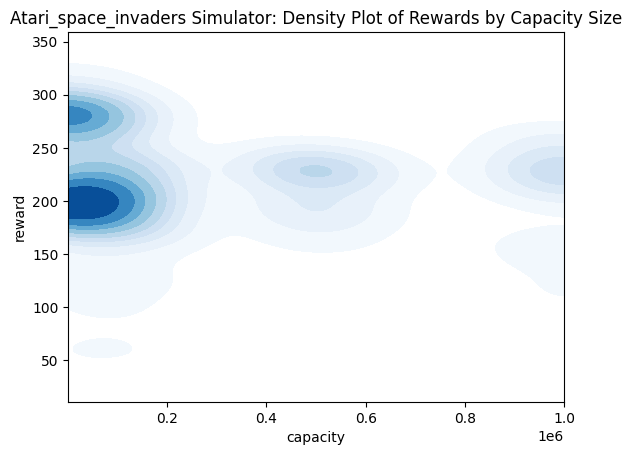


Shapiro-Wilk test
ShapiroResult(statistic=0.9578144550323486, pvalue=5.843757993461513e-21)
0.9578144550323486
5.843757993461513e-21

Kruskal-Wallis test
Kruskal-Wallis Test Statistic: 777.5710746758635
p-value: 1.2825666662854926e-163

Dunn's Post Hoc Test
              500            1000           5000          10000     
500      1.000000e+00   9.316997e-14   3.005112e-56  1.433059e-30  \
1000     9.316997e-14   1.000000e+00  8.346732e-119  1.638092e-79   
5000     3.005112e-56  8.346732e-119   1.000000e+00  1.719611e-05   
10000    1.433059e-30   1.638092e-79   1.719611e-05  1.000000e+00   
50000    4.013648e-24   7.916883e-69   1.373619e-08  1.698420e-01   
100000   4.535668e-33   1.249021e-83   1.266858e-04  6.375553e-01   
500000   1.687681e-15   2.863855e-53   5.278624e-15  4.289628e-04   
1000000  2.788754e-14   8.316611e-51   4.172545e-16  1.200960e-04   

              50000         100000        500000        1000000  
500      4.013648e-24  4.535668e-33  1.687681e-15  2.

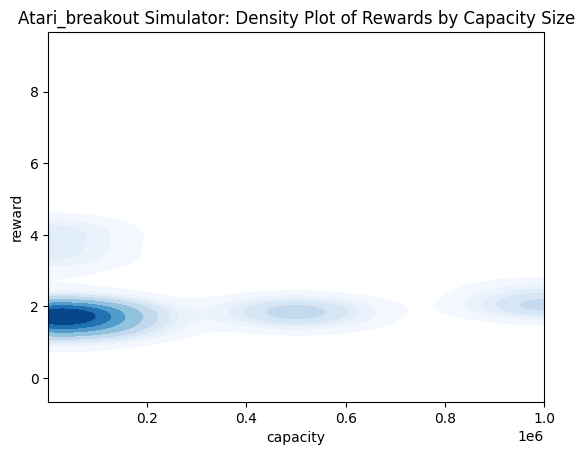


Shapiro-Wilk test
ShapiroResult(statistic=0.7534608244895935, pvalue=1.233142648605839e-43)
0.7534608244895935
1.233142648605839e-43

Kruskal-Wallis test
Kruskal-Wallis Test Statistic: 947.7439176321609
p-value: 2.34364525650881e-200

Dunn's Post Hoc Test
              500            1000           5000          10000     
500      1.000000e+00   6.057704e-63   3.722270e-20  1.907829e-01  \
1000     6.057704e-63   1.000000e+00  1.305159e-148  4.995064e-73   
5000     3.722270e-20  1.305159e-148   1.000000e+00  2.847068e-15   
10000    1.907829e-01   4.995064e-73   2.847068e-15  1.000000e+00   
50000    3.327633e-01   3.191334e-56   2.508748e-24  2.262620e-02   
100000   6.415099e-08  9.800148e-109   1.554497e-04  4.037348e-05   
500000   1.027205e-01   1.305822e-51   2.491190e-27  3.259786e-03   
1000000  1.260970e-22   3.465065e-12   1.819555e-80  1.133331e-28   

              50000          100000        500000        1000000  
500      3.327633e-01   6.415099e-08  1.027205e-01  1.

KeyboardInterrupt: 

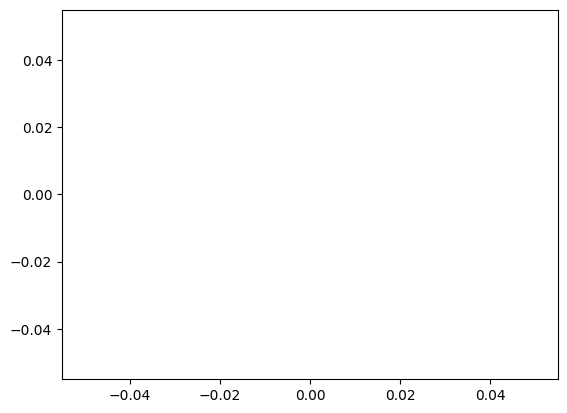

In [14]:
for f in files:
    statisticalTesting(f)